## Medical Insurance Cost Prediction

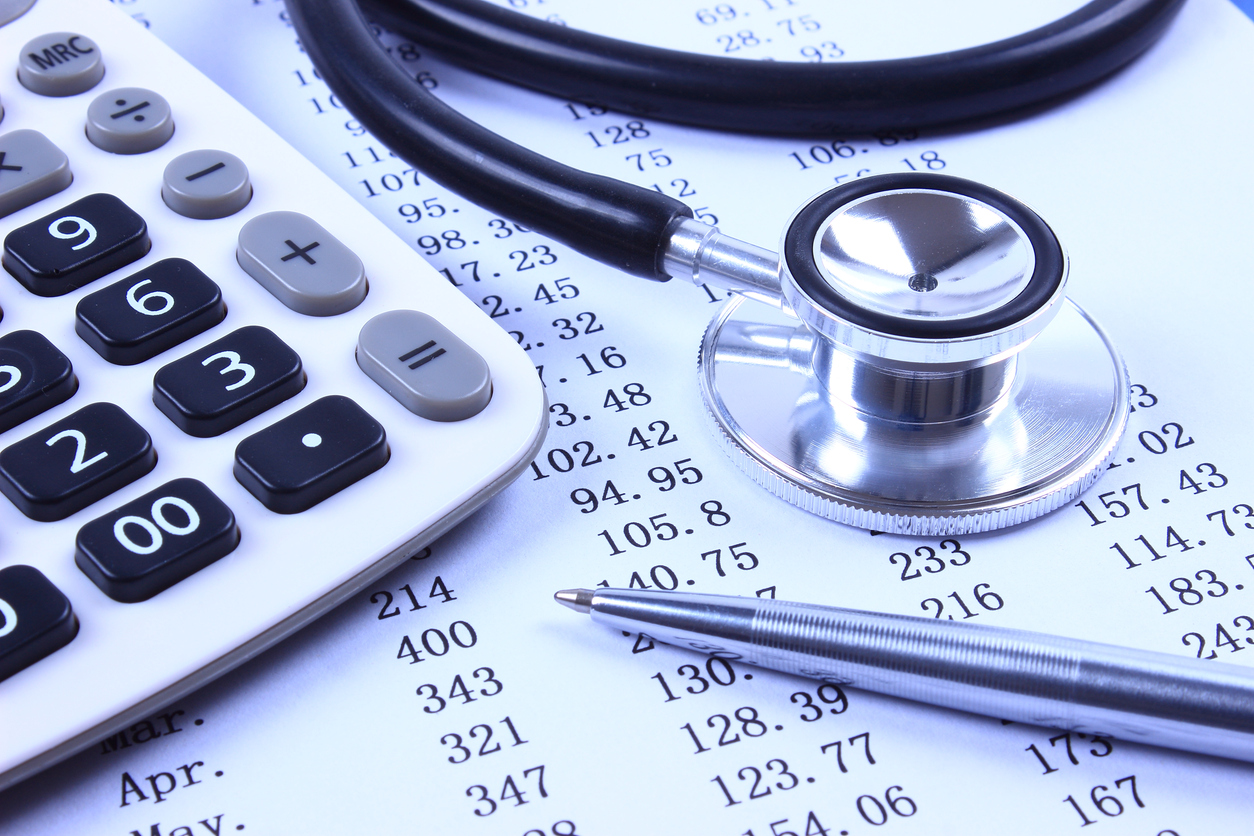

## Problem Statement

    -Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to 
    have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost.
    
    > age: age of primary beneficiary

    > sex: insurance contractor gender, female, male

    > bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    > children: Number of children covered by health insurance / Number of dependents

    > smoker: Smoking

    > region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
    
    -We have to find out which Factors Influence the Price of Health Insurance the most.

### Business Goal 

It is required to model the medical charges with the available independent variables. It will be used to understand how exactly the charges vary with the independent variables. And accordingly conclude the factors which affects the most on the charges.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Viraj/OneDrive/Documents/Birla 2nd Sem/ML/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


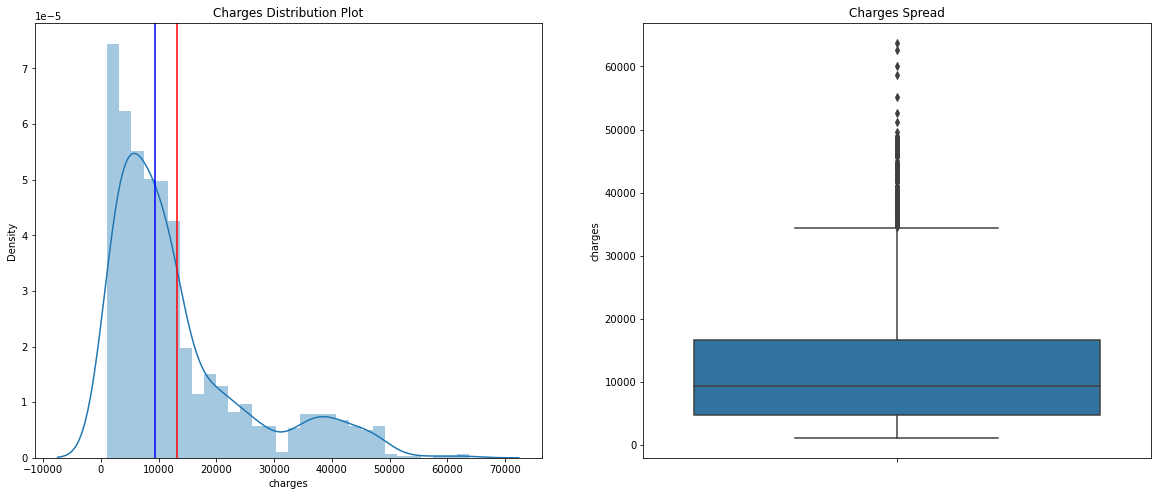

In [6]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Charges Distribution Plot')
sns.distplot(df.charges)
plt.axvline(df.charges.mean(), color="r")
plt.axvline(df.charges.median(), color="b")

plt.subplot(1,2,2)
plt.title('Charges Spread')
sns.boxplot(y=df.charges)

plt.show()

This distribution is right-skewed.

In [7]:
print(df.charges.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
85%      24990.166996
90%      34831.719700
100%     63770.428010
max      63770.428010
Name: charges, dtype: float64


#### Inference :

1. The plot seemed to be right-skewed, meaning that the most charges in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the charges distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the insurance charges.(85% of the charges are below 25,000, whereas the remaining 15% are between 25,000 and 63,770.)

#### Visualising Categorical Data:

    -sex
    -smoker
    -region

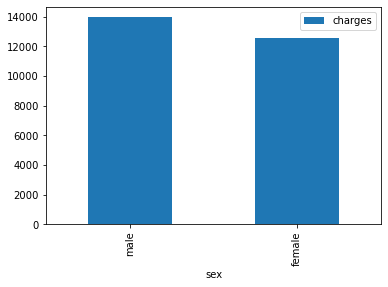

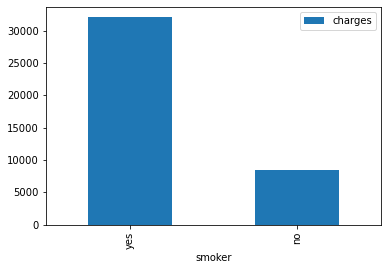

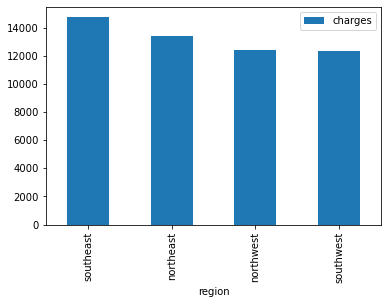

In [8]:
for i in df.select_dtypes(["object"]).columns:
    df1= pd.DataFrame(df.groupby([i])['charges'].mean().sort_values(ascending = False))
    df1.plot.bar()
    plt.xlabel = i
    plt.ylabel='Charges'


#### Inference :

1. In an average males pay more medical charges with respect to the females. 
2. We can see there is significant difference between the charges paid by the smokers and the non- smokers. Smokers pays more charges than the non-smokers.
3. Overall the highest medical charges are in the Southeast and the lowest are in the Southwest.

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dummification / One Hot Encoding

In [10]:
cat_cols=list(df.select_dtypes(["object"]).columns)
cat_cols

['sex', 'smoker', 'region']

In [11]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


------

In [12]:
X= df.drop(['charges'], axis = 1)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [13]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['age','bmi','children']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [16]:
X_train.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.458171,0.399088,0.220513,0.497863,0.194444,0.244658,0.282051,0.242521
std,0.306065,0.167115,0.241223,0.500263,0.395984,0.430114,0.450239,0.428837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.277441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.391176,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.512039,0.400000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X_test.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.467662,0.387383,0.215423,0.522388,0.228856,0.238806,0.248756,0.243781
std,0.304236,0.156621,0.241072,0.500121,0.420620,0.426885,0.432831,0.429897
min,0.000000,0.023002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.478261,0.383105,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733696,0.483051,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.890503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
print(Lin_reg.score(X_test, y_test))

0.7772310511733103


In [21]:
coef=list(Lin_reg.coef_)
coef

[11961.081954183359,
 10767.96846562856,
 2362.1328333681363,
 -0.06206879864941634,
 23990.32373205,
 -755.4085649598612,
 -941.4032215197511,
 -1601.7141236700745]

In [22]:
Xcols=list(X.columns)
Xcols

['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [23]:
A=zip(Xcols,coef)
B=pd.DataFrame(A)
B

,0,1
0,age,11961.081954
1,bmi,10767.968466
2,children,2362.132833
3,sex_male,-0.062069
4,smoker_yes,23990.323732
5,region_northwest,-755.408565
6,region_southeast,-941.403222
7,region_southwest,-1601.714124


In [24]:
B.rename(columns = {0 : 'Factors', 1 : 'Charges'}, inplace = True)
B

,Factors,Charges
0,age,11961.081954
1,bmi,10767.968466
2,children,2362.132833
3,sex_male,-0.062069
4,smoker_yes,23990.323732
5,region_northwest,-755.408565
6,region_southeast,-941.403222
7,region_southwest,-1601.714124


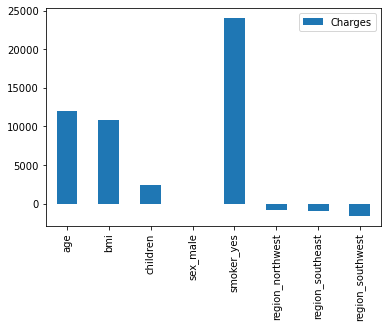

In [25]:
B.plot.bar()
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels=list(B.Factors))
plt.xlabel = 'Factors'
plt.ylabel='Charges'

Smoking is the greatest factor that affects medical cost charges, then it's age and bmi.

### RFECV

In [26]:
from sklearn.feature_selection import RFECV

In [27]:
rfecv = RFECV(estimator=LinearRegression(), cv=5)
rfecv.fit(X, y)
X_new = rfecv.transform(X)
print("Num Features Before:", X.shape[1])
print("Num Features After:", X_new.shape[1])

Num Features Before: 8
Num Features After: 8


It seems that all the 8 factors affects the medical cost charges.

But From the Linear Regression Coeffecient we can think of dropping the region columns one by one.

## Model 1

In [28]:
X1= X.drop(['region_southwest'], axis = 1)
X1

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast
0,19,27.900,0,0,1,0,0
1,18,33.770,1,1,0,0,1
2,28,33.000,3,1,0,0,1
3,33,22.705,0,1,0,1,0
4,32,28.880,0,1,0,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0
1334,18,31.920,0,0,0,0,0
1335,18,36.850,0,0,0,0,1
1336,21,25.800,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y_train,y_test = train_test_split(X1,y, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['age','bmi','children']
X1_train[num_vars] = scaler.fit_transform(X1_train[num_vars])
X1_test[num_vars] = scaler.transform(X1_test[num_vars])

In [31]:
Lin_reg = LinearRegression()
Lin_reg.fit(X1_train, y_train)

LinearRegression()

In [32]:
print(Lin_reg.score(X1_test, y_test))

0.7805635995513427


## Model 2

In [33]:
X2= X1.drop(['region_southeast'], axis = 1)
X2

,age,bmi,children,sex_male,smoker_yes,region_northwest
0,19,27.900,0,0,1,0
1,18,33.770,1,1,0,0
2,28,33.000,3,1,0,0
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1
...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,0,0
1336,21,25.800,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y_train,y_test = train_test_split(X2,y, test_size = 0.3, random_state = 100)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['age','bmi','children']
X2_train[num_vars] = scaler.fit_transform(X2_train[num_vars])
X2_test[num_vars] = scaler.transform(X2_test[num_vars])

In [36]:
Lin_reg = LinearRegression()
Lin_reg.fit(X2_train, y_train)

LinearRegression()

In [37]:
print(Lin_reg.score(X2_test, y_test))

0.7802639093663231


## Model 3

In [38]:
X3= X1.drop(['region_northwest'], axis = 1)
X3

,age,bmi,children,sex_male,smoker_yes,region_southeast
0,19,27.900,0,0,1,0
1,18,33.770,1,1,0,1
2,28,33.000,3,1,0,1
3,33,22.705,0,1,0,0
4,32,28.880,0,1,0,0
...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,0,1
1336,21,25.800,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y_train,y_test = train_test_split(X3,y, test_size = 0.3, random_state = 100)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['age','bmi','children']
X3_train[num_vars] = scaler.fit_transform(X3_train[num_vars])
X3_test[num_vars] = scaler.transform(X3_test[num_vars])

In [41]:
Lin_reg = LinearRegression()
Lin_reg.fit(X3_train, y_train)

LinearRegression()

In [42]:
print(Lin_reg.score(X3_test, y_test))

0.7805282369051553


We can finalize the Model 1 where the LR score is maximum // 0.7805635

## VIF of Model 1

In [43]:
def checkVIF(X):
    vif = pd.DataFrame() # expty dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [47]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
#Calculating the Variance Inflation Factor
checkVIF(X1_train)

,Features,VIF
1,bmi,4.31
0,age,2.87
3,sex_male,1.87
2,children,1.76
6,region_southeast,1.69
5,region_northwest,1.39
4,smoker_yes,1.24


Here all the VIF values are below 5, Good to go with this selected factors.